In [372]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [373]:
# load datasets

df_08 = pd.read_csv('data_08_v4.csv')
df_18 = pd.read_csv('data_18_v4.csv')

All the dataypes are now fixed! Take one last check to confirm all the changes.

In [374]:
df_08.dtypes == df_18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

In [375]:
# Save your final CLEAN datasets as new files!
df_08.to_csv('clean_08.csv', index=False)
df_18.to_csv('clean_18.csv', index=False)

In [376]:
# load datasets
df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

In [377]:
df_08.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,6.0,15.0,20.0,17.0,4,no


### Q1: Are more unique models using alternative fuels in 2018 compared to 2008? By how much?

In [378]:
df_08.fuel.value_counts()

Gasoline    1575
ethanol       66
gas           65
diesel         7
CNG            2
Name: fuel, dtype: int64

In [379]:
df_18.fuel.value_counts()

Gasoline       1270
Gas              54
Ethanol          54
Diesel           37
Electricity      35
Name: fuel, dtype: int64

Looks like the alternative sources of fuel available in 2008 are CNG and ethanol, and those in 2018 ethanol and electricity. (You can use Google if you weren't sure which ones are alternative sources of fuel!)

In [380]:
# how many unique models used alternative sources of fuel in 2008

alt_08 = df_08.query('fuel in ["CNG","ethanol"]').model.nunique()
alt_08

33

In [381]:
# how many unique models used alternative sources of fuel in 2018
alt_18 = df_18.query(('fuel in ["Electricity","Ethanol"]')).model.nunique()
alt_18

60

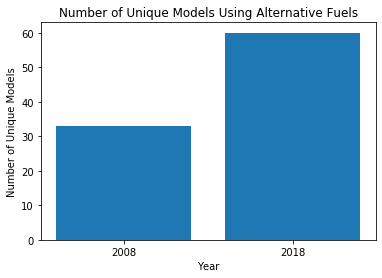

In [382]:
plt.bar(["2008", "2018"], [alt_08, alt_18])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

Since 2008, the number of unique models using alternative sources of fuel increased by 27

### Q2: How much have vehicle classes improved in fuel economy?

Let's look at the average fuel economy for each vehicle class for both years.

In [383]:
df_08.veh_class.value_counts()

SUV              508
small car        504
pickup           217
midsize car      216
large car        108
station wagon     90
van               37
minivan           35
Name: veh_class, dtype: int64

In [384]:
df_08.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,6.0,15.0,20.0,17.0,4,no


In [385]:
v08 = df_08.groupby('veh_class').cmb_mpg.mean()

In [386]:
v18 = df_18.groupby('veh_class').cmb_mpg.mean()

In [387]:
v08

veh_class
SUV              17.956693
large car        18.888889
midsize car      21.791667
minivan          18.371429
pickup           16.096774
small car        21.730159
station wagon    22.700000
van              13.783784
Name: cmb_mpg, dtype: float64

In [388]:
v18

veh_class
large car          24.246667
midsize car        30.035242
minivan            25.714286
pickup             18.151515
small SUV          24.263158
small car          25.480638
special purpose    19.666667
standard SUV       19.301282
station wagon      29.766667
van                14.750000
Name: cmb_mpg, dtype: float64

In [389]:
# how much they've increased by for each vehicle class
inc = v18 - v08
inc

veh_class
SUV                     NaN
large car          5.357778
midsize car        8.243576
minivan            7.342857
pickup             2.054741
small SUV               NaN
small car          3.750479
special purpose         NaN
standard SUV            NaN
station wagon      7.066667
van                0.966216
Name: cmb_mpg, dtype: float64

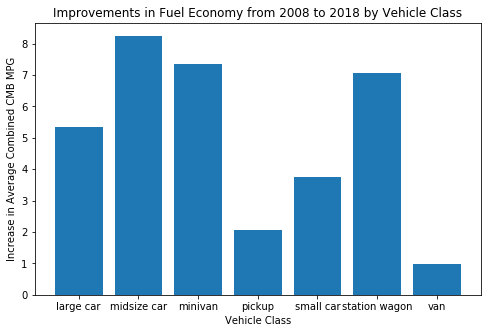

In [390]:
# only plot the classes that exist in both years
inc.dropna(inplace=True)

plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined CMB MPG');

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?


In [391]:
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no


In [392]:
# smartway labels for 2008
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [393]:
# smartway labels for 2018
df_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [394]:
df_08.smartway.value_counts()

no     1148
yes     567
Name: smartway, dtype: int64

In [395]:
df_18.smartway.value_counts()

No       1230
Yes       174
Elite      46
Name: smartway, dtype: int64

In [396]:
smart08 = df_08.query('smartway == "yes"')

In [397]:
smart08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,2.516755,4.717813,7.033510,21.382716,28.758377,24.102293,6.985891
std,0.598453,0.951891,1.023024,3.615815,3.142633,3.168994,0.814930
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.000000,4.000000,6.000000,19.000000,27.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,21.000000,29.000000,24.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,31.000000,25.000000,7.000000
max,5.000000,8.000000,9.000000,48.000000,45.000000,46.000000,10.000000


In [398]:
smart18 = df_18.query('smartway in ["Yes","Elite"]')

In [399]:
smart18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,1.898636,4.159091,5.272727,38.095455,43.413636,40.059091,8.122727
std,0.619580,0.915198,1.812736,21.178411,17.045917,19.171925,1.215738
min,0.600000,2.000000,3.000000,19.000000,23.000000,21.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,35.000000,31.000000,7.000000
50%,1.800000,4.000000,6.000000,30.000000,38.000000,33.000000,8.000000
75%,2.000000,4.000000,7.000000,40.000000,43.000000,42.000000,9.000000
max,4.000000,8.000000,8.000000,145.000000,121.000000,133.000000,10.000000


### Q4: What features are associated with better fuel economy?

You can explore trends between cmb_mpg and the other features in this dataset, or filter this dataset like in the previous question and explore the properties of that dataset. 
For example, you can select all vehicles that have the top 50% fuel economy ratings like this.

In [400]:
top8 = df_08.query('cmb_mpg > cmb_mpg.mean()')

In [401]:
top8.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000
mean,2.663785,4.915888,6.639019,20.390187,27.718458,23.078271,6.654206
std,0.666103,1.029361,1.085501,3.337134,3.105390,3.018414,0.824795
min,1.300000,4.000000,1.000000,17.000000,20.000000,20.000000,4.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,6.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.000000,48.000000,45.000000,46.000000,10.000000


In [402]:
top18 = df_18.query('cmb_mpg > cmb_mpg.mean()')

In [403]:
top18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,1.988475,4.092199,4.946809,29.553191,36.542553,32.168440,6.510638
std,0.490976,0.626822,1.867933,15.014700,12.147698,13.653346,1.547895
min,0.600000,2.000000,1.000000,21.000000,26.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,37.000000,32.000000,7.000000
max,4.000000,8.000000,8.000000,145.000000,121.000000,133.000000,10.000000


### Q5: For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?


This is a question regarding models that were updated since 2008 and still being produced in 2018. In order to do this, we need a way to compare models that exist in both datasets. To do this, let's first learn about merges.

In [404]:
df_08.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,6.0,15.0,20.0,17.0,4,no


In [405]:
df_18.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA ILX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,25.0,35.0,29.0,6,No
1,ACURA MDX,3.0,6,AMS-7,4WD,Gasoline,small SUV,3.0,26.0,27.0,27.0,6,No


In [406]:
# rename 2008 columns

df_08 = df_08.rename(columns=lambda x: x[:10] + "_2008")

In [407]:
# merge datasets

df_combined = df_08.merge(df_18,left_on="model_2008",right_on="model",how="inner")

In [408]:
df_combined.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,AMS-7,4WD,Gasoline,small SUV,3.0,26.0,27.0,27.0,6,No
1,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,2WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,2WD,Gasoline,small SUV,3.0,20.0,27.0,23.0,5,No
3,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,4WD,Gasoline,small SUV,3.0,18.0,26.0,21.0,4,No
4,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,4WD,Gasoline,small SUV,3.0,19.0,26.0,22.0,4,No


In [422]:
df_combined.to_csv('combined_dataset.csv', index=False)

In [423]:
combined_dataset = pd.read_csv("combined_dataset.csv")

In [427]:
#Create a new dataframe, model_mpg, that contain the mean combined mpg values in 2008 and 2018 for each unique model

model_mpg = combined_dataset.groupby("model").mean()[['cmb_mpg_2008', 'cmb_mpg']]

In [428]:
model_mpg

,cmb_mpg_2008,cmb_mpg
model,,
ACURA MDX,17.000000,23.000000
ACURA RDX,19.000000,22.500000
AUDI A3,23.800000,28.000000
AUDI A4,21.600000,27.000000
AUDI A6,19.666667,25.666667
...,...,...
TOYOTA Yaris,31.500000,32.500000
VOLKSWAGEN GTI,24.500000,27.500000
VOLKSWAGEN Jetta,24.166667,30.000000


In [429]:
#Create a new column, mpg_change, with the change in mpg

model_mpg["mpg_change"] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']

In [434]:
model_mpg.head()

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA MDX,17.000000,23.000000,6.0
ACURA RDX,19.000000,22.500000,3.5
AUDI A3,23.800000,28.000000,4.2
AUDI A4,21.600000,27.000000,5.4
AUDI A6,19.666667,25.666667,6.0


In [435]:
#Find the vehicle that improved the most
#Find the max mpg change, and then use query or indexing to see what model it is

max_change = model_mpg["mpg_change"].max()
max_change

10.75

In [438]:
model_mpg[model_mpg["mpg_change"] == max_change]

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
CHEVROLET Malibu,22.25,33.0,10.75


Pandas also has a useful idxmax function you can use to find the index of the row containing a column's maximum value!

In [440]:
idx = model_mpg.mpg_change.idxmax()
idx

'CHEVROLET Malibu'

In [441]:
model_mpg.loc[idx]

cmb_mpg_2008    22.25
cmb_mpg         33.00
mpg_change      10.75
Name: CHEVROLET Malibu, dtype: float64